In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

In [2]:
nstars = 37
nparams = nstars*11+(3*3)+1
nparams_nt = 50*10+(3*3)+1
print(nparams)

#df = pd.read_csv('../data/stanfits/tau_models_200.csv', names=['kic', 'dnu',
#                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df = pd.read_csv('../data/stanfits/ngc6819_tau.csv', names=['kic', 'dnu',
                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df['kic'] = df['kic'].astype(int)
#display(df.describe())

hier = pd.read_csv('../data/stanfits/ngc6819_summ_tau.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
hier_nt = pd.read_csv('../data/stanfits/ngc6819_summ_notau.txt', skiprows=4, nrows=nparams_nt, delim_whitespace=True)
#display(hier.iloc[251])
epsA = hier.loc['epsA']['mean']#:'sd']
epsB = hier.loc['epsB']['mean']
alA = hier.loc['alA']['mean']
alB = hier.loc['alB']['mean']
AA = hier.loc['AA']['mean']
AB = hier.loc['AB']['mean']
print(epsA, epsB)
print(alA, alB)
print(AA, AB)


df_rgb = pickle.load(open('df_rgb.pkl', 'rb'))
df_rcl = pickle.load(open('df_rc.pkl', 'rb'))

417
-0.304 0.22
0.022000000000000002 0.359
0.09699999999999999 0.8440000000000001


In [3]:
dnus = np.linspace(df_rgb['dnu'].min(), df_rgb['dnu'].max(), 50)
dnus2 = np.linspace(0.1, df['dnu'].max(), 20)
As = AA * dnus**(-AB)
alphas = alA * dnus**(-alB)
epsilons = epsA + epsB*np.log(dnus)
depsilons = epsA + epsB*np.log(df['dnu'])
#df['eps_resi'] = df['epsilon'] - depsilons
#phis = -3.75 + 2.75*np.log(dnus)
phis = -1.9 + 1.5*np.log(dnus)
#plt.scatter(np.log(df['dnu'].loc[(df['phi'] > 0)]), np.log(df['phi'].loc[(df['phi'] > 0)]))
#plt.scatter((df['dnu']), (df['phi']))
#plt.plot(np.log(dnus), -dnus**2, color='r')
#0.601 + 0.632 logΔν
#plt.plot(dnus, phis, color='r')
#plt.xlim(0,10)
#df.loc[df.epsilon > 0.45, 'epsilon'] = df['epsilon'] - 1

#display(df)

In [4]:
apokasc = pd.read_csv('../data/APOKASCfull.csv', usecols=['KIC', 'Teff2', '[M/H]2', 'M2', 'R2'])
apokasc = pd.read_csv('../data/apokasc2.csv', delim_whitespace=True,
                      usecols=['KIC', 'Teff', 'FeH', 'M(cor)', 'R(cor)', 'ES', '<Rho>'])
apokasc = apokasc.replace('        ', np.nan)
apokasc = apokasc.replace('...', np.nan)
#display(apokasc)
metals = []
temps = []
Rs = []
Ms = []
evols = []
rhos = []


for i in df['kic']:
    if any(apokasc['KIC'] == i):
        z = apokasc.loc[(apokasc.KIC == i)]['FeH'].values
        T = apokasc.loc[(apokasc.KIC == i)]['Teff'].values
        R = apokasc.loc[(apokasc.KIC == i)]['R(cor)'].values
        M = apokasc.loc[(apokasc.KIC == i)]['M(cor)'].values
        rho = apokasc.loc[(apokasc.KIC == i)]['<Rho>'].values
        evol = apokasc.loc[(apokasc.KIC == i)]['ES'].values
        metals.append(float(z[0]))
        temps.append(float(T[0]))
        Rs.append(float(R[0]))
        Ms.append(float(M[0]))
        rhos.append(float(rho[0]))
        evols.append(evol[0])
    else:
        metals.append(np.nan)
        temps.append(np.nan)
        Rs.append(np.nan)
        Ms.append(np.nan)
        rhos.append(np.nan)
        evols.append(np.nan)

        
df['FeH'] = metals
df['Teff'] = temps
df['M'] = Ms
df['R'] = Rs
df['rho'] = rhos
df['ES'] = evols
#df = df.dropna(subset=['tau'])
#display(df)
ts = df.dropna(subset=['tau']).reset_index(drop=True)
tsa = np.asarray(ts.index) + 1
nts = np.arange(max(tsa)+1, 49, 1) + 1
#nts = np.where(df['tau'].isna())[0] + 1

err_eps = np.zeros([49])
err_alpha = np.zeros([49])
err_A = np.zeros([49])
err_G = np.zeros([49])
err_phi = np.zeros([49])
err_tau = np.zeros([49])

#print(hier.loc['epsilon[148]']['sd'])
print(ts, nts)
for i in tsa:
    err_eps[i-1] = (hier.loc['epsilon['+str(i)+']']['sd'])
    err_alpha[i-1] = (hier.loc['alpha['+str(i)+']']['sd'])
    err_A[i-1] = (hier.loc['A['+str(i)+']']['sd'])
    err_G[i-1] = (hier.loc['G['+str(i)+']']['sd'])
    err_phi[i-1] = (hier.loc['phi['+str(i)+']']['sd'])
    err_tau[i-1] = (hier.loc['tau['+str(i)+']']['sd'])
print(hier_nt.loc['alpha[36]']['sd'])
for i in nts:
    err_eps[i-1] = (hier_nt.loc['epsilon['+str(i)+']']['sd'])
    err_alpha[i-1] = (hier_nt.loc['alpha['+str(i)+']']['sd'])
    err_A[i-1] = (hier_nt.loc['A['+str(i)+']']['sd'])
    err_G[i-1] = (hier_nt.loc['G['+str(i)+']']['sd'])
    err_phi[i-1] = (hier_nt.loc['phi['+str(i)+']']['sd'])
    err_tau[i-1] = 0

print(len(df))
    
print(np.shape(err_eps))

df['e_eps'] = err_eps
df['e_al'] = err_alpha
df['e_A'] = err_A
df['e_G'] = err_G
df['e_phi'] = err_phi
df['e_tau'] = err_tau
df = df.drop([38])

#df = df[df.ES != 'REJECT']
#df = df.dropna(subset=['FeH', 'Teff', 'ES'])

phirange = []
for i in df['phi']:
    if i < -np.pi:
        nphi = i + 2*np.pi
        phirange.append(nphi)
    elif i > np.pi:
        nphi = i - 2*np.pi
        phirange.append(nphi)
    else: phirange.append(i)
df['phi'] = phirange


df
#print(phirange)

        kic        dnu       numax   epsilon     alpha         A         G  \
0   5113441  11.717951  155.995804  0.253564  0.007328  0.012466  3.577292   
1   5024240  11.986175  154.019794  0.238324  0.009100  0.013468  3.164068   
2   5111718  10.547797  134.517767  0.230939  0.007608  0.015508  2.495949   
3   5112072  10.063279  126.089626  0.189667  0.009612  0.012284  3.031180   
4   5024143   9.655105  119.945892  0.200037  0.010725  0.013629  3.145996   
5   5023845   8.927777  109.524753  0.181385  0.009714  0.016030  3.713451   
6   5024405   8.247694   98.428967  0.185625  0.006689  0.015774  2.823108   
7   5024312   8.096852   95.834918  0.157576  0.009933  0.017917  2.933210   
8   4937770   6.463386   77.909087  0.049562  0.010803  0.020928  3.071761   
9   5024414   6.648978   74.119254  0.144709  0.011758  0.018055  3.694923   
10  5024512   6.135433   68.435187  0.143943  0.008064  0.020551  3.015428   
11  5112361   5.721813   63.262727  0.071693  0.013058  0.022257

,kic,dnu,numax,epsilon,alpha,A,G,phi,tau,FeH,...,M,R,rho,ES,e_eps,e_al,e_A,e_G,e_phi,e_tau
0,5113441,11.717951,155.995804,0.253564,0.007328,0.012466,3.577292,2.300584,10.101152,0.161,...,1.667,5.994,0.010910,RGB,0.033,0.00100,0.002,0.279,0.626,3.532
1,5024240,11.986175,154.019794,0.238324,0.009100,0.013468,3.164068,2.036424,10.758115,0.004,...,1.365,5.509,0.011520,RGB,0.043,0.00200,0.002,0.311,0.823,3.601
2,5111718,10.547797,134.517767,0.230939,0.007608,0.015508,2.495949,2.503273,9.272412,0.155,...,1.645,6.388,0.008898,RGB,0.012,0.00100,0.003,0.234,0.356,3.867
3,5112072,10.063279,126.089626,0.189667,0.009612,0.012284,3.031180,2.306618,10.060443,0.073,...,1.589,6.524,0.008073,RGB,0.009,0.00100,0.002,0.277,0.270,3.623
4,5024143,9.655105,119.945892,0.200037,0.010725,0.013629,3.145996,2.083236,11.207069,0.106,...,1.650,6.771,0.007497,RGB(S),0.041,0.00100,0.002,0.256,0.658,3.465
5,5023845,8.927777,109.524753,0.181385,0.009714,0.016030,3.713451,1.816337,7.462334,NaN,...,NaN,NaN,NaN,NaN,0.037,0.00100,0.002,0.366,0.568,3.408
6,5024405,8.247694,98.428967,0.185625,0.006689,0.015774,2.823108,2.013054,7.700420,NaN,...,NaN,NaN,NaN,NaN,0.011,0.00100,0.003,0.238,0.297,3.914
7,5024312,8.096852,95.834918,0.157576,0.009933,0.017917,2.933210,2.172181,7.591465,NaN,...,NaN,NaN,NaN,NaN,0.035,0.00100,0.003,0.158,0.671,3.707
8,4937770,6.463386,77.909087,0.049562,0.010803,0.020928,3.071761,-0.179094,9.464804,0.078,...,1.555,7.601,0.004993,RGB,0.028,0.00100,0.004,0.797,2.826,3.905
9,5024414,6.648978,74.119254,0.144709,0.011758,0.018055,3.694923,1.252928,6.757110,NaN,...,NaN,NaN,NaN,NaN,0.035,0.00200,0.002,0.474,0.527,3.954


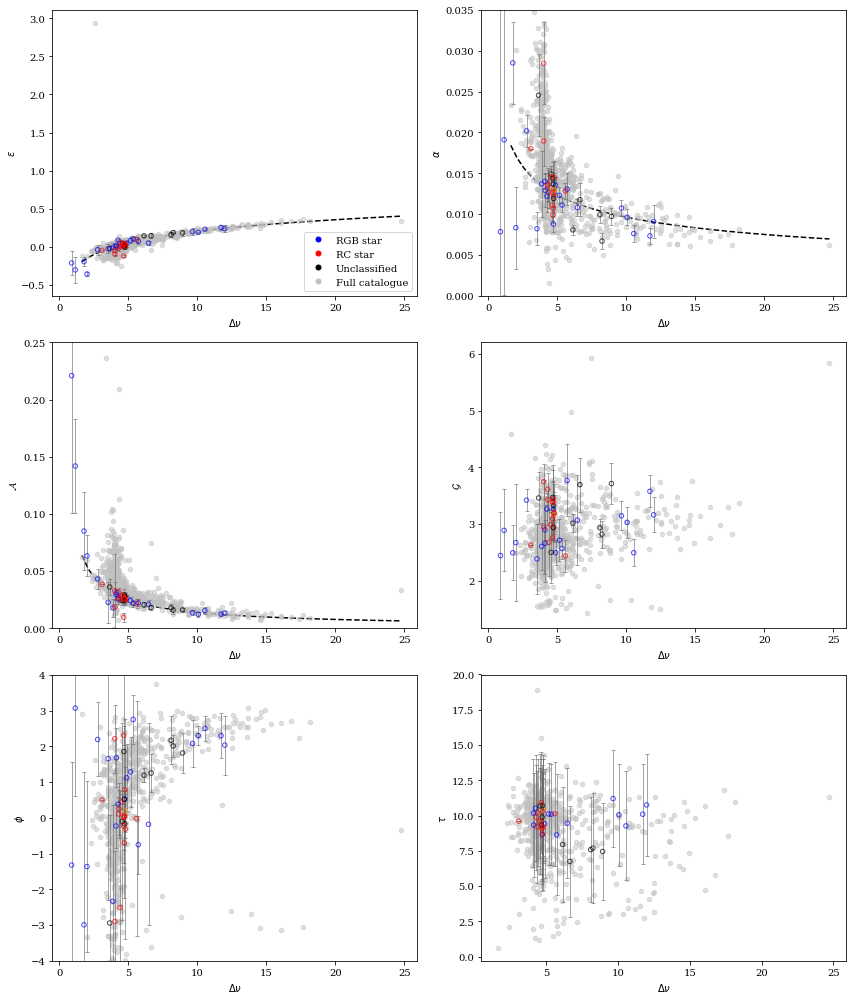

In [5]:
colours=['red' if i=='RC' else 'orange' if i=='RC(S)' else
        'blue' if i=='RGB' else 'blue' if i=='RGB(S)' else
         'k' for i in df['ES']]

kwargs = dict(s=20, facecolors='none', zorder=1, edgecolors=colours, alpha=0.7, label='')
apokwg = dict(s=20, color='silver', zorder=-1, alpha=0.5, label='')
errkwg = dict(fmt="none", c='dimgrey', capsize=2, alpha=0.6,
              markersize=4, elinewidth=1, zorder=0, label='')

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(12,14))

ax3.scatter(df_rgb['dnu'], df_rgb['A'], **apokwg)
ax3.scatter(df_rcl['dnu'], df_rcl['A'], **apokwg)
ax3.scatter(df['dnu'], df['A'], **kwargs)
ax3.errorbar(df['dnu'], df['A'], yerr=df['e_A'], **errkwg)
ax3.plot(dnus, As, '--', c='k', zorder=-2)
ax3.set_ylim([0,0.25])
ax3.set_xlabel(r'$\Delta\nu$')
ax3.set_ylabel('$\mathcal{A}$')

ax4.scatter(df_rgb['dnu'], df_rgb['G'], **apokwg)
ax4.scatter(df_rcl['dnu'], df_rcl['G'], **apokwg)
ax4.scatter(df['dnu'], df['G'], **kwargs)
ax4.errorbar(df['dnu'], df['G'], yerr=df['e_G'], **errkwg)
ax4.set_xlabel(r'$\Delta\nu$')
ax4.set_ylabel('$\mathcal{G}$')

ax5.scatter(df_rgb['dnu'], df_rgb['phi'], **apokwg)
ax5.scatter(df_rcl['dnu'], df_rcl['phi'], **apokwg)
ax5.scatter(df['dnu'], df['phi'], **kwargs)
ax5.errorbar(df['dnu'], df['phi'], yerr=df['e_phi'], **errkwg)
#ax5.plot(dnus, phis, '--', c='k')
ax5.set_ylim([-4,4])
ax5.set_xlabel(r'$\Delta\nu$')
ax5.set_ylabel(r'$\phi$')

ax6.scatter(df_rgb['dnu'], df_rgb['tau'], **apokwg)
ax6.scatter(df_rcl['dnu'], df_rcl['tau'], **apokwg)
ax6.scatter(df['dnu'], df['tau'], **kwargs)
ax6.errorbar(df['dnu'], df['tau'], yerr=df['e_tau'], **errkwg)
ax6.set_xlabel(r'$\Delta\nu$')
ax6.set_ylabel(r'$\tau$')

ax1.scatter(df_rgb['dnu'], df_rgb['epsilon'], **apokwg)
ax1.scatter(df_rcl['dnu'], df_rcl['epsilon'], **apokwg)
ax1.scatter(df['dnu'], df['epsilon'], **kwargs)
ax1.errorbar(df['dnu'], df['epsilon'], yerr=df['e_eps'], **errkwg)
ax1.plot(dnus, epsilons, '--', c='k', zorder=-2)
ax1.set_xlabel(r'$\Delta\nu$')
ax1.set_ylabel(r'$\epsilon$')

ax2.scatter(df_rgb['dnu'], df_rgb['alpha'], **apokwg)
ax2.scatter(df_rcl['dnu'], df_rcl['alpha'], **apokwg)
ax2.scatter(df['dnu'], df['alpha'], **kwargs)
ax2.errorbar(df['dnu'], df['alpha'], yerr=df['e_al'], **errkwg)
ax2.plot(dnus, alphas, '--', c='k', zorder=-2)
ax2.set_ylim([0,0.035])
ax2.set_xlabel(r'$\Delta\nu$')
ax2.set_ylabel(r'$\alpha$')

bluedot = plt.Line2D([], [], color='blue', marker='o', linestyle='',
                          markersize=5, label='RGB star')
reddot = plt.Line2D([], [], color='red', marker='o', linestyle='',
                          markersize=5, label='RC star')
greydot = plt.Line2D([], [], color='k', marker='o', linestyle='',
                          markersize=5, label='Unclassified')
back = plt.Line2D([], [], color='silver', marker='o', linestyle='',
                          markersize=5, label='Full catalogue')
ax1.legend(handles=[bluedot, reddot, greydot, back], loc=4)

plt.tight_layout()
plt.savefig('plots/ngc6819parameters.pdf')
plt.show()

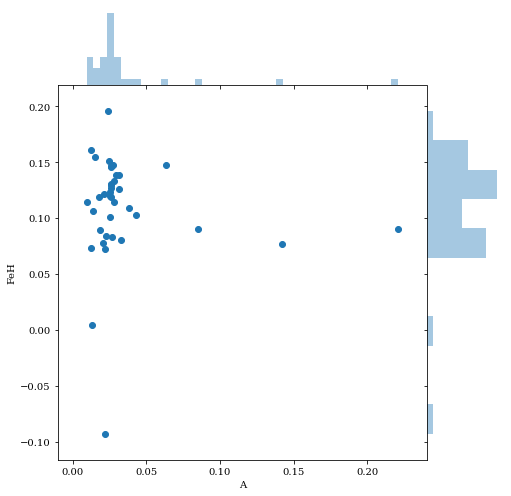

In [91]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1 = sns.jointplot(df['A'], df['FeH'], height=7, space=0)

ValueError: c of shape (48,) not acceptable as a color sequence for x with size 37, y with size 37

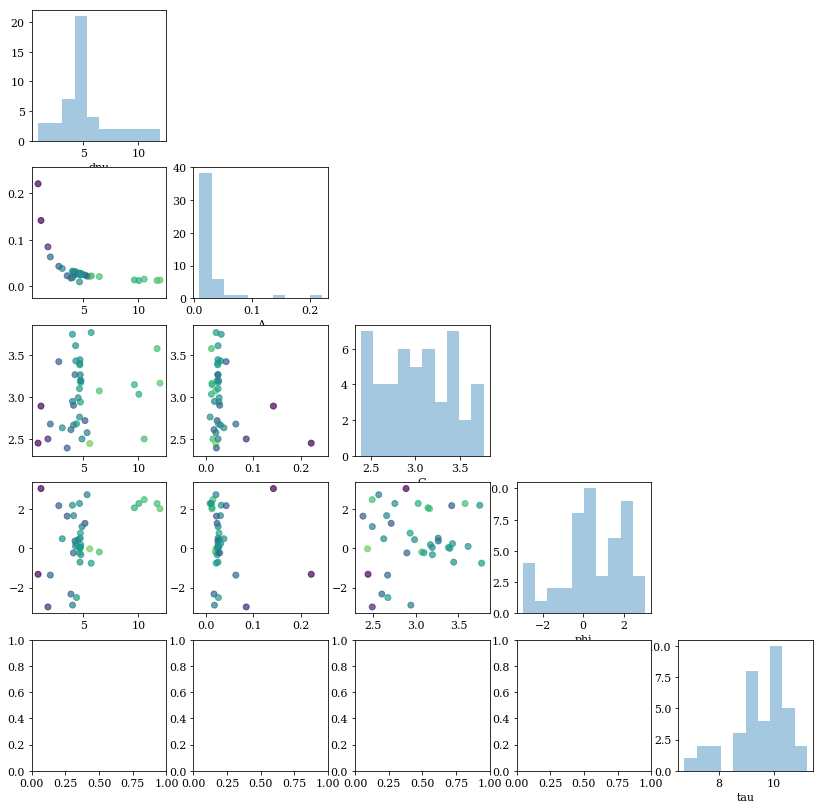

In [35]:
plt.figure(figsize=(14,14))
gs = GridSpec(5, 5)
diag0 = plt.subplot(gs[0, 0:1])
diag1 = plt.subplot(gs[1, 1:2])
diag2 = plt.subplot(gs[2, 2:3])
diag3 = plt.subplot(gs[3, 3:4])
diag4 = plt.subplot(gs[4, 4:5])
ax1a = plt.subplot(gs[1, 0:1])
ax2a = plt.subplot(gs[2, 0:1])
ax2b = plt.subplot(gs[2, 1:2])
ax3a = plt.subplot(gs[3, 0:1])
ax3b = plt.subplot(gs[3, 1:2])
ax3c = plt.subplot(gs[3, 2:3])
ax4a = plt.subplot(gs[4, 0:1])
ax4b = plt.subplot(gs[4, 1:2])
ax4c = plt.subplot(gs[4, 2:3])
ax4d = plt.subplot(gs[4, 3:4])

colours = dict(c=df['Teff'], cmap='viridis', vmin=4400, vmax=5200)
dist_kwargs = dict(kde=False, bins=10)
scat_kwargs = dict(marker='o', alpha=0.7, **colours)

sns.distplot(df['dnu'], ax=diag0, **dist_kwargs)
sns.distplot(df['A'], ax=diag1, **dist_kwargs)
sns.distplot(df['G'], ax=diag2, **dist_kwargs)
sns.distplot(df['phi'], ax=diag3, **dist_kwargs)
sns.distplot(ts['tau'], ax=diag4, **dist_kwargs)

a = ax1a.scatter(df['dnu'], df['A'], **scat_kwargs)
ax2a.scatter(df['dnu'], df['G'], **scat_kwargs)
ax2b.scatter(df['A'], df['G'], **scat_kwargs)
ax3a.scatter(df['dnu'], df['phi'], **scat_kwargs)
ax3b.scatter(df['A'], df['phi'], **scat_kwargs)
ax3c.scatter(df['G'], df['phi'], **scat_kwargs)
ax4a.scatter(ts['dnu'], ts['tau'], **scat_kwargs)
ax4b.scatter(df['A'], df['tau'], **scat_kwargs)
ax4c.scatter(df['G'], df['tau'], **scat_kwargs)
ax4d.scatter(ts['phi'], ts['tau'], **scat_kwargs)

diags = [diag0, diag1, diag2, diag3]
inner = [ax2b, ax3b, ax3c]
side = [ax1a, ax2a, ax3a]
bottom = [ax4b, ax4c, ax4d, diag4]
ax4a.spines['right'].set_visible(False)
ax4a.spines['top'].set_visible(False)

for i in diags:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False, left=False)
    i.set(xlabel='')
for i in inner:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False)
for i in side:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False)
for i in bottom:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelleft=False)

diag0.set_ylabel(r'$\Delta\nu$')
ax1a.set_ylabel(r'$\mathcal{A}$')
ax2a.set_ylabel(r'$\mathcal{G}$')
ax3a.set_ylabel(r'$\phi$')
ax4a.set_ylabel(r'$\tau$')
#ax2b.set_xlim([0.015, 0.035])

ax4a.set_xlabel(r'$\Delta\nu$')
ax4b.set_xlabel(r'$\mathcal{A}$')
ax4c.set_xlabel(r'$\mathcal{G}$')
ax4d.set_xlabel(r'$\phi$')
diag4.set_xlabel(r'$\tau$')

cax = plt.axes([0.8, 0.3, 0.025, 0.2])
cbar = plt.colorbar(a, cax=cax, use_gridspec=True)
cbar.set_label('Surface Temperature (K)')
#plt.tight_layout()
plt.savefig('plots/ngc6819correlations.pdf')
plt.show()

In [172]:
h_rgb = pd.read_csv('../data/stanfits/rgb_tau_hiers.csv', index_col='Unnamed: 0')
h_rcl = pd.read_csv('../data/stanfits/rc_tau_hiers.csv', index_col='Unnamed: 0')
h_6819 = pd.read_csv('../data/stanfits/ngc6819_tau_hiers.csv')
h_6791 = pd.read_csv('../data/stanfits/ngc6791_tau_hiers.csv')
dists = [h_rgb, h_rcl, h_6819, h_6791]
h_6819
print(np.mean(h_rgb['A_sig']))

0.003819375475147487


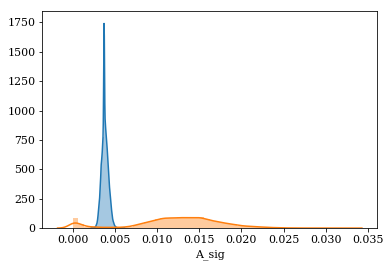

In [167]:
sns.distplot(h_rgb['A_sig'], label='rgb apokasc')
#sns.distplot(h_rcl['A_sig'], label='rc apokasc')
sns.distplot(h_6819['A_sig'], label='6819')
#sns.distplot(h_6791['A_sig'], label='6791')
#plt.legend()
#from scipy import stats
#print(stats.mode(h_6819['A_sig']))
#print([np.mean(i['A_sig']) for i in dists])
#print([np.std(i['A_sig']) for i in dists])
#display(df)

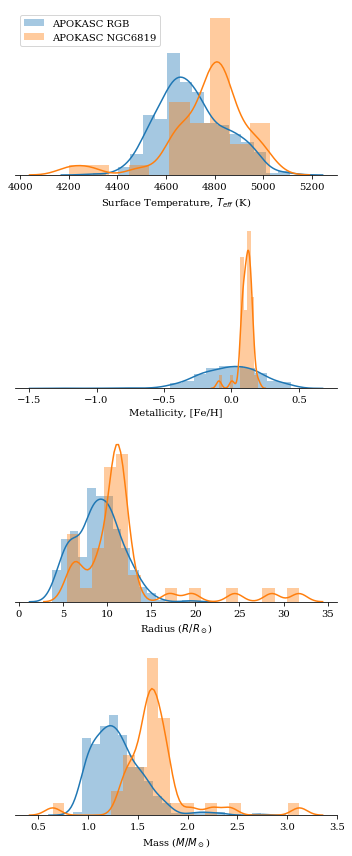

In [7]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5,12))
cut = df.dropna(subset=['FeH', 'Teff', 'M', 'R', 'rho', 'ES'])
sns.distplot(df_rgb['Teff'], ax=ax1, label='APOKASC RGB')
sns.distplot(cut['Teff'], ax=ax1, label='APOKASC NGC6819')
sns.distplot(df_rgb['FeH'], ax=ax2)
sns.distplot(cut['FeH'], ax=ax2)
sns.distplot(df_rgb['R'], ax=ax3)
sns.distplot(cut['R'], ax=ax3)
sns.distplot(df_rgb['M'], ax=ax4)
sns.distplot(cut['M'], ax=ax4)
ax = [ax1, ax2, ax3, ax4]
for i in ax:
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.tick_params(labelleft=False, left=False)

ax1.set_xlabel('Surface Temperature, $T_{eff}$ (K)')
ax2.set_xlabel('Metallicity, [Fe/H]')
ax3.set_xlabel(r'Radius ($R/R_\odot$)')
ax4.set_xlabel(r'Mass ($M/M_\odot$)')
ax1.legend()
plt.tight_layout()
plt.savefig('plots/datadistplots.pdf')